# Data visualization using Matplotlib

In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib

In [2]:
matplotlib.__version__

'3.10.0'

## Import nyc-citibike data

In [3]:
df = pd.read_csv('nyc-citibike_data.csv', index_col = 0, low_memory=False)

In [4]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
member_casual          object
year_month             object
date                   object
avgTemp               float64
_merge                 object
dtype: object

In [5]:
df.drop(columns = {'year_month', '_merge'}, inplace = True)

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,avgTemp
0,5772778972800B87,electric_bike,2023-12-20 06:18:04.187,2023-12-20 06:24:50.461,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,2023-12-20,2.3
1,32DD834BEA2ABA5B,classic_bike,2023-12-21 16:15:52.308,2023-12-21 16:21:22.124,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,2023-12-21,3.6
2,3B6B1AA2B94A01D1,classic_bike,2023-12-07 11:49:31.277,2023-12-07 11:56:07.264,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,2023-12-07,2.1
3,A8F4C66161031B63,electric_bike,2023-12-26 06:17:43.385,2023-12-26 06:24:11.386,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,2023-12-26,7.1
4,A6176AFE373FB4C8,electric_bike,2023-12-21 06:58:24.078,2023-12-21 07:04:17.045,E 53 St & 3 Ave,6617.02,1 Ave & E 68 St,6822.09,member,2023-12-21,3.6


In [7]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [8]:
print(df.shape)

(35106710, 11)


## Line plot of the temperatures for 2023

In [11]:
df['date'] = pd.to_datetime(df['date'])
df_temp = df.set_index('date')

In [12]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,avgTemp
date,,,,,,,,,,
2023-12-20,5772778972800B87,electric_bike,2023-12-20 06:18:04.187,2023-12-20 06:24:50.461,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,2.3
2023-12-21,32DD834BEA2ABA5B,classic_bike,2023-12-21 16:15:52.308,2023-12-21 16:21:22.124,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,3.6
2023-12-07,3B6B1AA2B94A01D1,classic_bike,2023-12-07 11:49:31.277,2023-12-07 11:56:07.264,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,2.1
2023-12-26,A8F4C66161031B63,electric_bike,2023-12-26 06:17:43.385,2023-12-26 06:24:11.386,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,7.1
2023-12-21,A6176AFE373FB4C8,electric_bike,2023-12-21 06:58:24.078,2023-12-21 07:04:17.045,E 53 St & 3 Ave,6617.02,1 Ave & E 68 St,6822.09,member,3.6


In [22]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

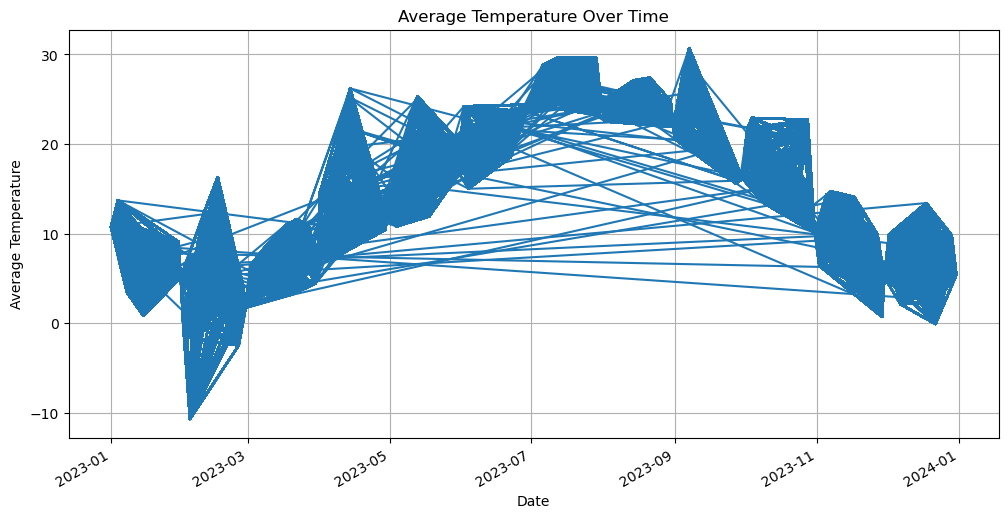

In [23]:
df_temp['avgTemp'].plot(figsize=(12,6))  # bigger figure size so it looks nicer
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

In [24]:
df_temp.shape

(35106710, 10)

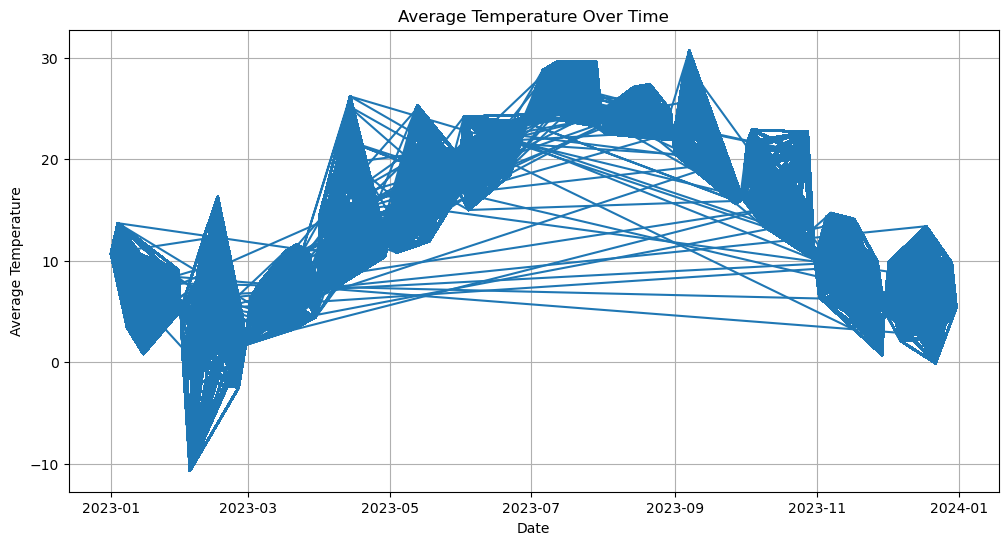

In [29]:
plt.figure(figsize=(12,6))
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.plot(df_temp['avgTemp'])
plt.show()

In [26]:
df_temp['avgTemp'].count()

np.int64(35106710)

In [28]:
df_temp['avgTemp'].isna().sum()

np.int64(0)

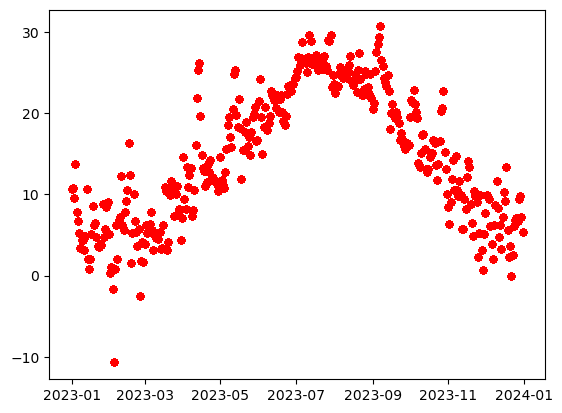

In [30]:
plt.scatter(df_temp.index, df_temp['avgTemp'], s=20, c='red', alpha=0.5)

In [50]:
num_dots = df_temp['avgTemp'].notna().sum()
print("Number of dots in the scatter plot:", num_dots)

Number of dots in the scatter plot: 35106710


#### After merging, each ride got matched to the correct day's temperature.
#### So now every ride carries a copy of the day's avgTemp. That’s why we have 35 million avgTemp values

## We should use the nyc weather data frame

In [56]:
# Import NYC weather data
df_weather = pd.read_csv('nyc_weather_2023.csv', index_col = 0)

In [57]:
df_weather.dtypes

avgTemp    float64
dtype: object

In [58]:
df_weather.shape

(365, 1)

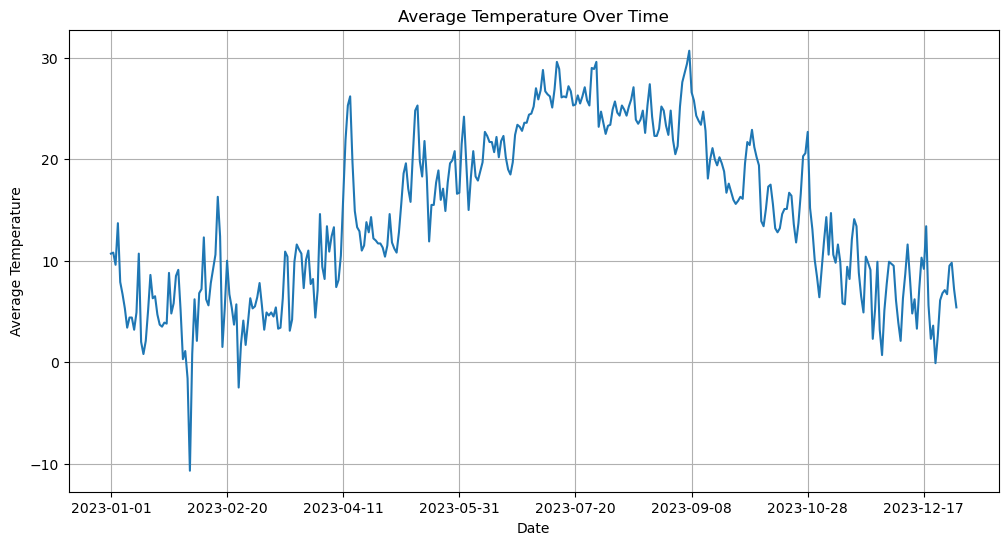

In [59]:
df_weather['avgTemp'].plot(figsize=(12,6))
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

In [60]:
df_weather.head()

,avgTemp
date,
2023-01-01,10.7
2023-01-02,10.8
2023-01-03,9.6
2023-01-04,13.7
2023-01-05,7.9


### Create trips per day and merge it with the weather dataframe.

In [64]:
df['date'] = pd.to_datetime(df['date'])

# Count number of rides per day
trip_counts = df.groupby('date').size().reset_index(name='trip_count')
trip_counts

,date,trip_count
0,2023-01-01,50642
1,2023-01-02,58241
2,2023-01-03,51789
3,2023-01-04,74454
4,2023-01-05,71440
...,...,...
360,2023-12-27,42288
361,2023-12-28,46808
362,2023-12-29,69036
363,2023-12-30,56099


In [71]:
trip_counts.dtypes

date          datetime64[ns]
trip_count             int64
dtype: object

In [76]:
# Reset df_weather's index so 'date' becomes a column
df_weather_reset = df_weather.reset_index()

# Convert 'date' column to datetime
df_weather_reset['date'] = pd.to_datetime(df_weather_reset['date'])

# Merge df_weather and trip_counts
df_weather_merged = pd.merge(df_weather_reset, trip_counts, on='date', how='left')

# Set 'date' back as the index
df_weather_merged = df_weather_merged.set_index('date')

In [82]:
print("Trip count for January 1st:", df_weather_merged.loc['2023-01-01', 'trip_count'])
print("Trip count for January 2nd:", df_weather_merged.loc['2023-01-02', 'trip_count'])

Trip count for January 1st: 50642.0
Trip count for January 2nd: 58241.0


In [87]:
df_weather_merged.dtypes

avgTemp       float64
trip_count      int64
dtype: object

In [88]:
df_weather_merged.head()

,avgTemp,trip_count
date,,
2023-01-01,10.7,50642
2023-01-02,10.8,58241
2023-01-03,9.6,51789
2023-01-04,13.7,74454
2023-01-05,7.9,71440


### Line chart of bike trip counts and temperatures plotted on a dual axis

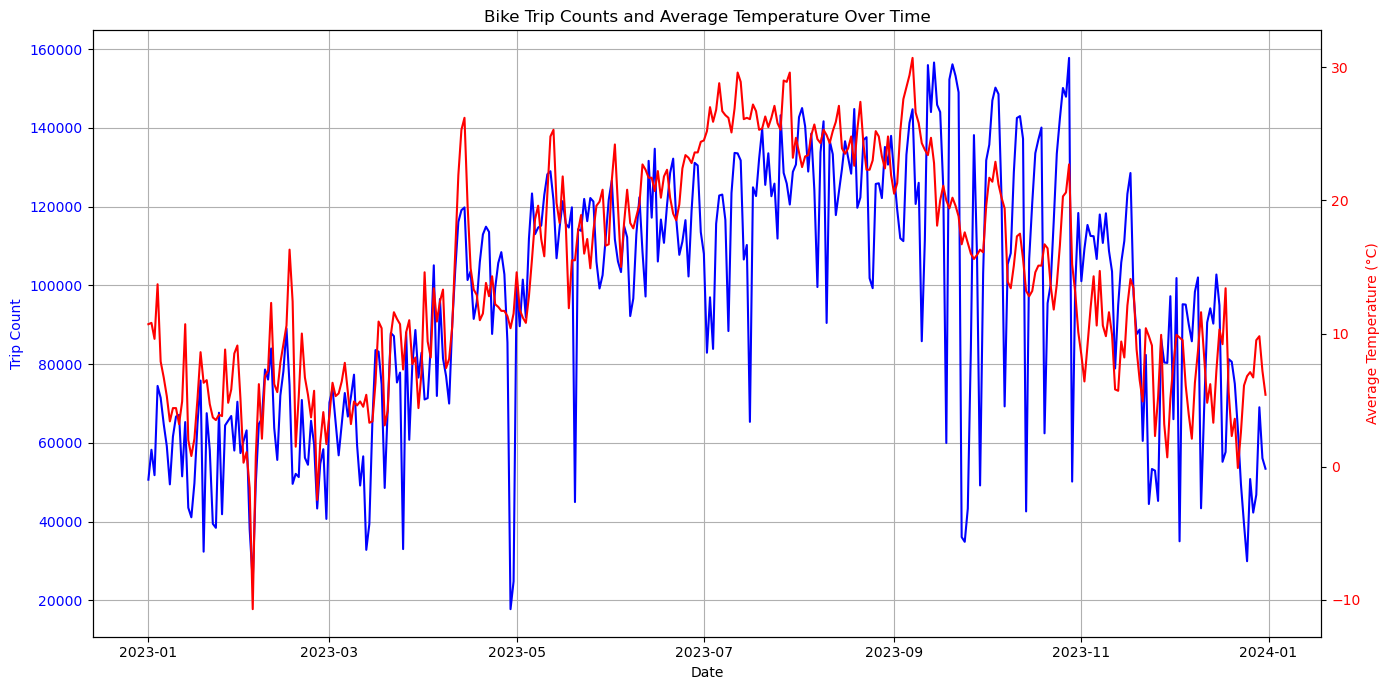

In [89]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14,7))

# Plot trip counts on the left y-axis
ax1.plot(df_weather_merged.index, df_weather_merged['trip_count'], color='blue', label='Trip Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Trip Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(df_weather_merged.index, df_weather_merged['avgTemp'], color='red', label='Avg Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title
plt.title('Bike Trip Counts and Average Temperature Over Time')

# Improve layout
fig.tight_layout()

# Show the plot
plt.show()

#### In this code, I used Matplotlib to create a dual-axis line chart where two different variables are plotted on two separate y-axes but share the same x-axis (date).

#### First, I created a figure and a primary axis (ax1) using plt.subplots().

#### On the primary y-axis (ax1, left side), I plotted the trip counts in blue color. Then, I created a secondary y-axis (ax2, right side) using ax1.twinx(). This shares the same x-axis (dates) but has an independent y-axis scale.

#### On the secondary y-axis (ax2), I plotted the average temperature in red color.

#### I customized each axis separately by setting labels, colors, and tick parameters.

#### fig.tight_layout() was used to automatically adjust the figure layout so that labels and titles do not overlap.

#### Finally, plt.show() was called to display the final plot.

#### This approach follows the Object-Oriented (OO) style of Matplotlib by treating each axis (ax1, ax2) as an independent object, allowing precise control over each plot element.

### Creating Two Plots in the Same Figure side by side

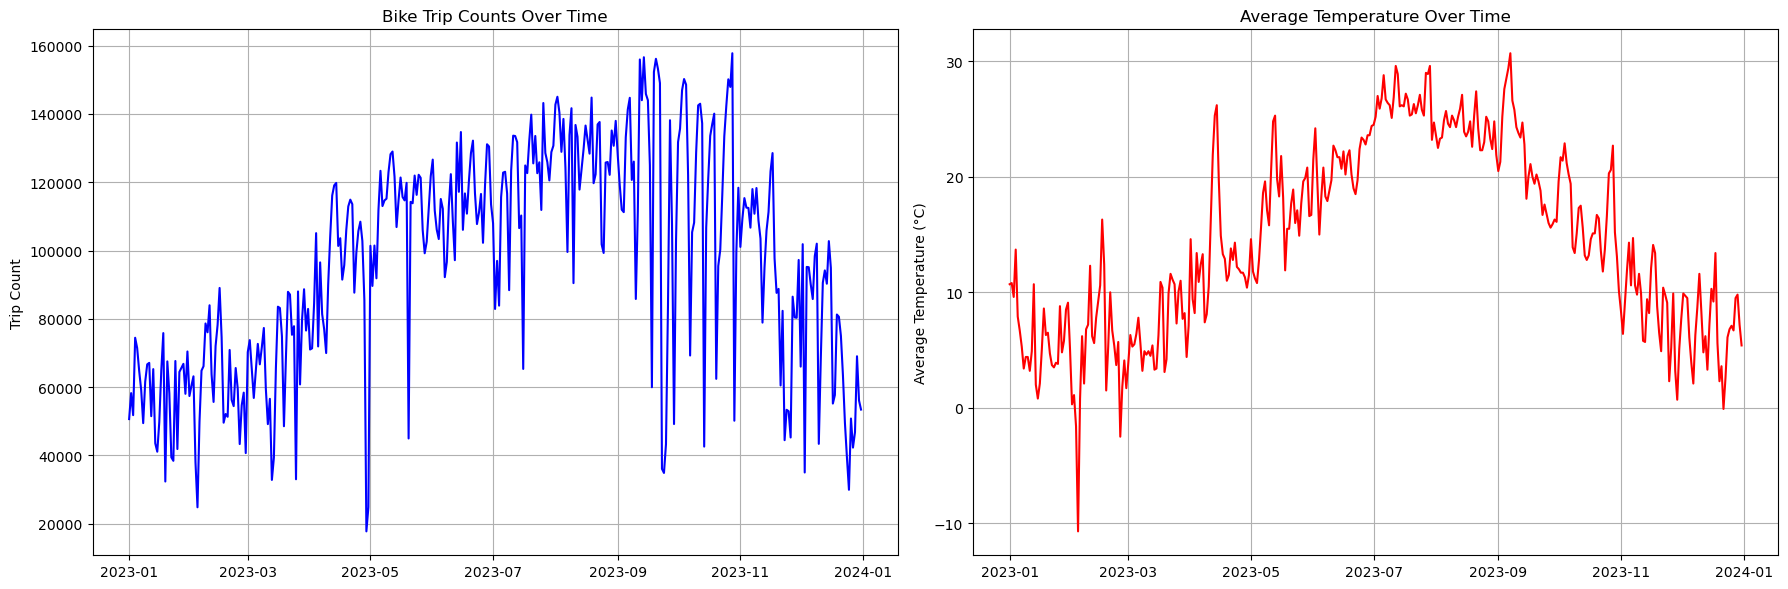

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Left plot: Trip count
axes[0].plot(df_weather_merged.index, df_weather_merged['trip_count'], color='blue')
axes[0].set_ylabel('Trip Count')
axes[0].set_title('Bike Trip Counts Over Time')
axes[0].grid(True)

# Right plot: Avg Temperature
axes[1].plot(df_weather_merged.index, df_weather_merged['avgTemp'], color='red')
axes[1].set_ylabel('Average Temperature (°C)')
axes[1].set_title('Average Temperature Over Time')
axes[1].grid(True)

# layout
plt.tight_layout()
plt.show()

#### I used Matplotlib to create two side-by-side plots (subplots) inside a single figure. This approach follows the Object-Oriented (OO) interface of Matplotlib, where each subplot (axis) is treated independently and customized separately.

#### I created a figure and an array of axes using plt.subplots(1, 2, figsize=(18,6)), meaning 1 row and 2 columns of plots.

#### On the left subplot (axes[0]), I plotted the bike trip counts over time in blue color.

#### On the right subplot (axes[1]), I plotted the average temperature over time in red color.

#### For each subplot, I individually set the title, y-axis label, and enabled the grid to improve readability.

#### plt.tight_layout() was used to automatically adjust spacing between the plots to prevent overlapping text.

#### Finally, plt.show() was called to render both plots together within the same figure.

# ** BONUS TASK **

## Create a histogram of the variable “tripduration” using matplotlib.

In [100]:
# Step 1: Convert started_at and ended_at to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [101]:
# Step 2: Create tripduration column (in seconds)
df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

In [102]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
tripduration                 float64
dtype: object

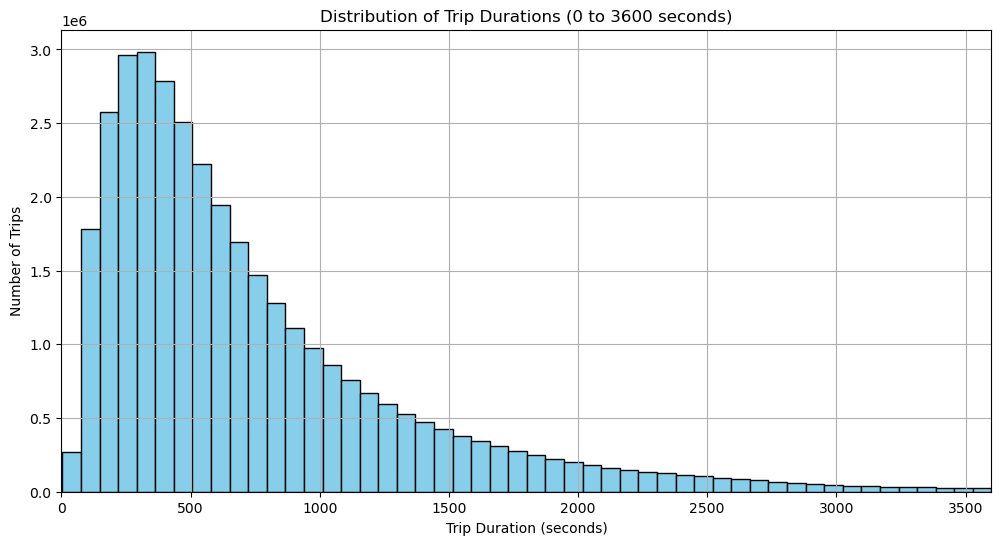

In [103]:
# Step 3: Create a histogram (filtering out very large trips for better view)
valid_trips = df[(df['tripduration'] > 0) & (df['tripduration'] < 3600)]  # Only trips less than 1 hour

# Step 4: Plot histogram
plt.figure(figsize=(12,6))
plt.hist(valid_trips['tripduration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Durations (0 to 3600 seconds)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xlim(0, 3600)  # x-axis to start at 0 and end at 3600
plt.show()

### Add a curve following the bins

#### When we want to add a smooth curve over the histogram bins, we're actually trying to estimate the probability density function (PDF) of the trip durations.
#### In Python, the best way to do that is using KDE (Kernel Density Estimation) or a smoothed curve.

In [108]:
import seaborn as sns

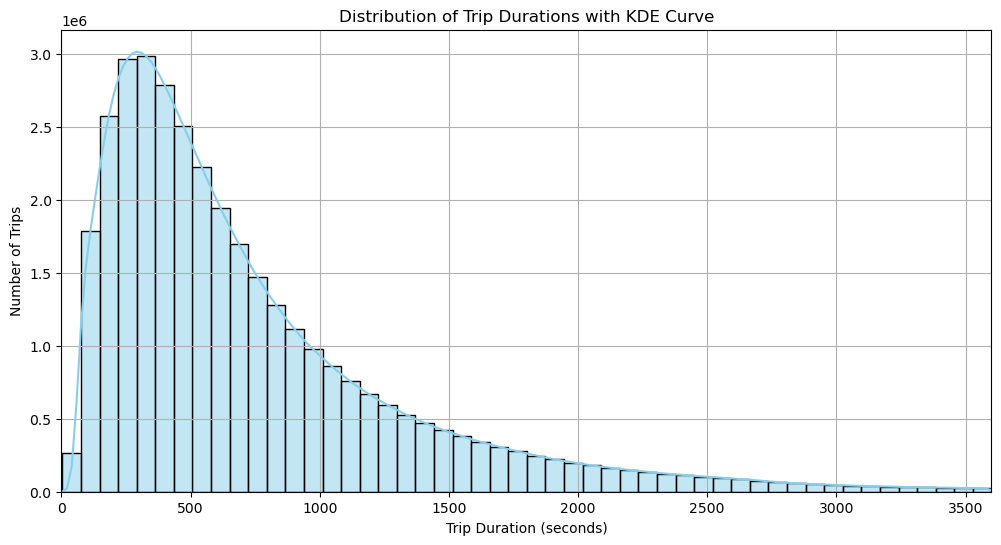

In [109]:
#  Plot histogram with curve
plt.figure(figsize=(12,6))

# Histogram
sns.histplot(valid_trips['tripduration'], bins=50, color='skyblue', kde=True, edgecolor='black')

# Titles and labels
plt.title('Distribution of Trip Durations with KDE Curve')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xlim(0, 3600)

plt.show()

member_casual
member    28513683
casual     6593027
Name: count, dtype: int64


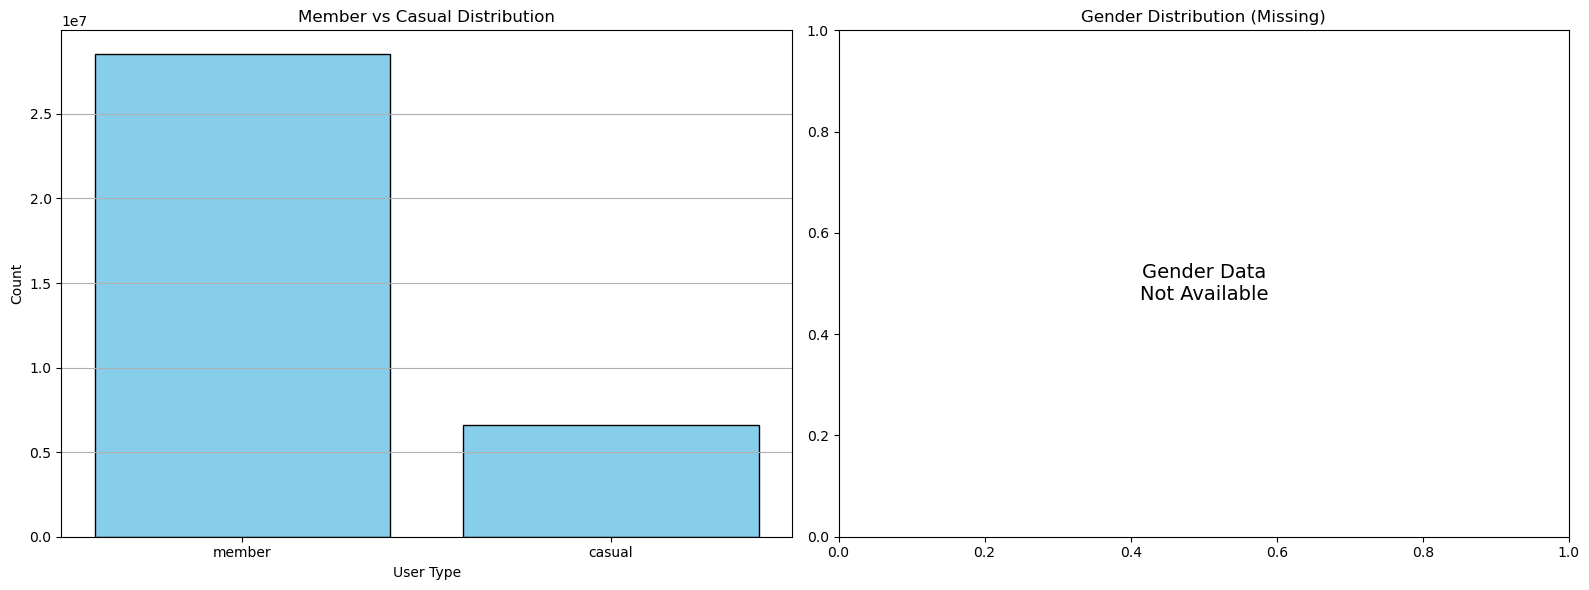

In [111]:
# Step 1: Check the data
print(df['member_casual'].value_counts())

# Step 2: Create a figure with two plots (bar and pie)
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Left Plot: Bar Chart for member_casual ---
member_counts = df['member_casual'].value_counts()
axes[0].bar(member_counts.index, member_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Member vs Casual Distribution')
axes[0].set_xlabel('User Type')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y')

# --- Right Plot: Pie Chart for gender ---
# First check if 'gender' exists, otherwise we'll handle it
if 'gender' in df.columns:
    gender_counts = df['gender'].value_counts()
    axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
    axes[1].set_title('Gender Distribution')
else:
    axes[1].text(0.5, 0.5, 'Gender Data\nNot Available', ha='center', va='center', fontsize=14)
    axes[1].set_title('Gender Distribution (Missing)')

# Step 3: Layout
plt.tight_layout()
plt.show()
